__IMPORTS__

In [1]:
#import os
import IGIMF4
import numpy as np

In [2]:
#print(os.getcwd())

__INITIAL PARAMETERS__

In [3]:
# Parameters evaluated at time t

metal_mass_fraction = 1e-1 * 0.0142
M_igal = 1e10

In [4]:
# Grids

#mstar_v = np.logspace(-2,np.log10(3.6e3),num=50)
mstar_v = np.logspace(np.log10(0.07),np.log10(150), num=50)
print(f'{mstar_v=}')
print(f'{np.where(mstar_v<0.08)=}')
print(f'{np.where(mstar_v>150)=}\n')

Mecl_v = np.logspace(np.log10(5),10,num=50)
print(f'{Mecl_v=}')
print(f'{np.where(Mecl_v<5)=}')
print(f'{np.where(Mecl_v>5e9)=}\n')

Z_massfrac_v = np.logspace(-9,-1,num=50)
print(f'{Z_massfrac_v=}')
print(f'{np.where(Z_massfrac_v<1e-5)=}')
print(f'{np.where(Z_massfrac_v>0.0142)=}\n')

mstar_v=array([7.00000000e-02, 8.18610844e-02, 9.57319592e-02, 1.11953171e-01,
       1.30922972e-01, 1.53107092e-01, 1.79050179e-01, 2.09389169e-01,
       2.44868921e-01, 2.86360506e-01, 3.34882594e-01, 3.91626461e-01,
       4.57985240e-01, 5.35588120e-01, 6.26340347e-01, 7.32470000e-01,
       8.56582693e-01, 1.00172554e+00, 1.17146199e+00, 1.36995927e+00,
       1.60209074e+00, 1.87355550e+00, 2.19101836e+00, 2.56227341e+00,
       2.99643542e+00, 3.50416362e+00, 4.09792334e+00, 4.79229212e+00,
       5.60431757e+00, 6.55393591e+00, 7.66446144e+00, 8.96315893e+00,
       1.04819130e+01, 1.22580109e+01, 1.43350581e+01, 1.67640486e+01,
       1.96046171e+01, 2.29265031e+01, 2.68112629e+01, 3.13542722e+01,
       3.66670675e+01, 4.28800844e+01, 5.01458601e+01, 5.86427784e+01,
       6.85794491e+01, 8.01998295e+01, 9.37892145e+01, 1.09681240e+02,
       1.28266075e+02, 1.50000000e+02])
np.where(mstar_v<0.08)=(array([0]),)
np.where(mstar_v>150)=(array([49]),)

Mecl_v=array([5.00000000e

__DOWNSIZING CLASS__

In [5]:
downsizing_obj = IGIMF4.Downsizing(M_igal)

In [6]:
downsizing_obj.downsizing_time

0.9689945113416355

In [7]:
downsizing_obj.M_igal

10000000000.0

In [8]:
downsizing_obj.SFR

10.319975895585161

__IGIMF CLASS__

In [9]:
igimf4_obj = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)

In [10]:
igimf4_obj.alpha_1

0.4948600000000001

In [11]:
igimf4_obj.alpha_2

1.49486

In [12]:
igimf4_obj.SFR

10.319975895585161

In [13]:
igimf4_obj.Mtot

103199758.95585161

In [14]:
ECMF_res = igimf4_obj.ECMF()

In [15]:
ECMF_v = ECMF_res[2](Mecl_v)

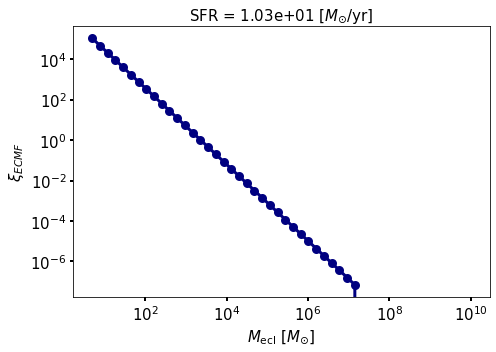

In [16]:
igimf4_obj.ECMF_plot(Mecl_v, ECMF_v)

In [17]:
SFR_v = np.logspace(-4,3,num=10)
print(f"{SFR_v=}")

SFR_v=array([1.00000000e-04, 5.99484250e-04, 3.59381366e-03, 2.15443469e-02,
       1.29154967e-01, 7.74263683e-01, 4.64158883e+00, 2.78255940e+01,
       1.66810054e+02, 1.00000000e+03])


In [18]:
ECMF_v_list = []
beta_ECMF_list = []
MeclMax_list = []
for S in SFR_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, S)
    beta_ECMF_list.append(igimf4.beta_ECMF)
    #print(f'SFR={S}, beta={igimf4.beta_ECMF}')
    ECMF_res = igimf4.ECMF()
    ECMF_v = ECMF_res[2](Mecl_v)
    MeclMax_list.append(ECMF_res[1])
    ECMF_v_list.append(ECMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

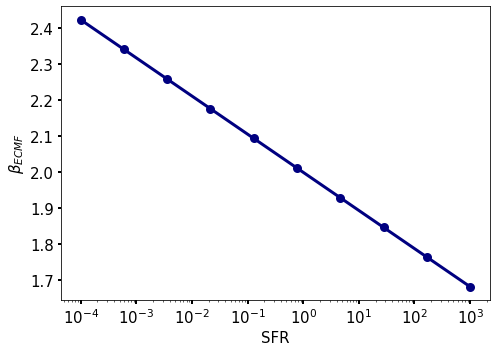

In [19]:
igimf4.beta_ECMF_plot(SFR_v, beta_ECMF_list)

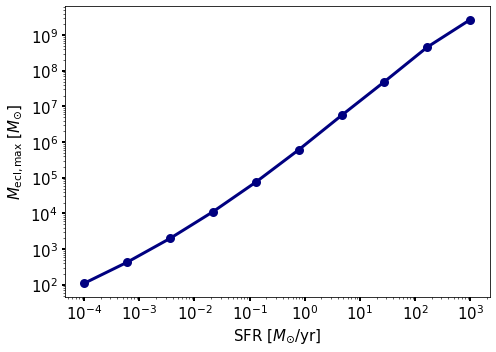

In [20]:
igimf4_obj.MeclMax_plot(SFR_v, MeclMax_list)

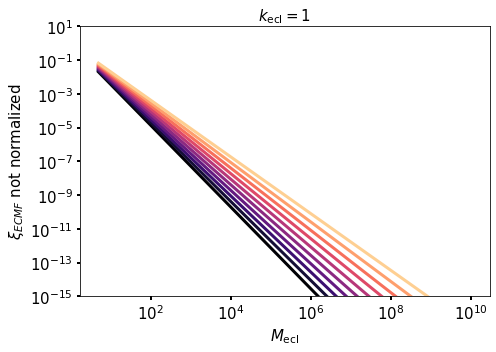

In [21]:
igimf4_obj.Mecl_power_beta_plot(Mecl_v, beta_ECMF_list, SFR_v)

<Figure size 432x288 with 0 Axes>

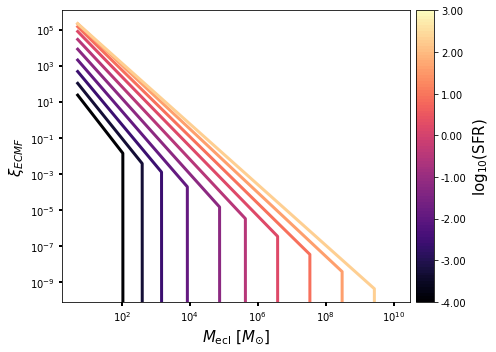

In [22]:
igimf4_obj.ECMF_plots(Mecl_v, ECMF_v_list, SFR_v)

In [23]:
Mtot_IMF = 1e2
sIMF = igimf4_obj.stellar_IMF(Mtot_IMF)

Mtot = 100.0,	 m_max = 12.430279219553805,	 k(m_max)=35.82290819128228


In [24]:
IMF_v = sIMF[2](mstar_v)

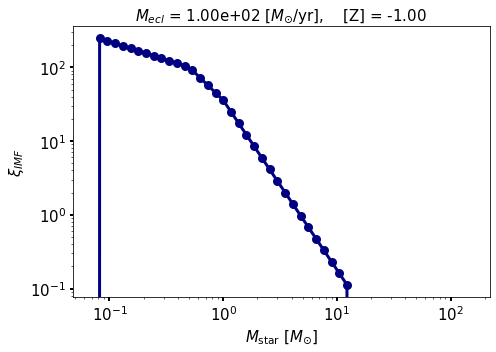

In [25]:
igimf4_obj.IMF_plot(mstar_v, IMF_v, Mtot_IMF)

In [26]:
IMF_v_list = []
m_max_list = []
k_IMF_list = []
for M in Mecl_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)
    sIMF = igimf4_obj.stellar_IMF(M)
    print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
    IMF_v = sIMF[2](mstar_v)
    m_max_list.append(sIMF[1])
    k_IMF_list.append(sIMF[0])
    IMF_v_list.append(IMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

Mtot = 5.000000000000001,	 m_max = 1.9368247764643747,	 k(m_max)=3.0809474557989196
M=5.00e+00,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 1.94e+00,	 [Z] = -1.00
Mtot = 7.740819541047465,	 m_max = 2.480970559617272,	 k(m_max)=4.256521797125447
M=7.74e+00,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 2.48e+00,	 [Z] = -1.00
Mtot = 11.984057433412458,	 m_max = 3.212848233313999,	 k(m_max)=5.968250612568789
M=1.20e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 3.21e+00,	 [Z] = -1.00
Mtot = 18.553285192318857,	 m_max = 4.198538228280377,	 k(m_max)=8.475181640107461
M=1.86e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 4.20e+00,	 [Z] = -1.00
Mtot = 28.723526513465664,	 m_max = 5.527237756400835,	 k(m_max)=12.167172146650085
M=2.87e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 5.53e+00,	 [Z] = -1.00
Mtot = 44.468727064645975,	 m_max = 7.318282785951159,	 k(m_max)=17.63288075640862
M=4.45e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 7.32e+00

In [27]:
k_IMF_list = np.array(k_IMF_list)
k_idx = np.where(k_IMF_list<1e10)[0]
print(Mecl_v[k_idx])

[5.00000000e+00 7.74081954e+00 1.19840574e+01 1.85532852e+01
 2.87235265e+01 4.44687271e+01 6.88448783e+01 1.06583156e+02
 1.65008195e+02 2.55459732e+02 3.95493537e+02 6.12288820e+02
 9.47923453e+02 1.46754088e+03 2.27199382e+03 3.51741883e+03
 5.44554089e+03 8.43058986e+03 1.30519350e+04 2.02065346e+04
 3.12830276e+04 4.84312543e+04 7.49795199e+04 1.16080587e+05
 1.79711775e+05 2.78223283e+05 4.30735246e+05 6.66848761e+05
 1.03239118e+06 1.59831077e+06 2.47444705e+06 3.83084962e+06
 5.93078311e+06 9.18182436e+06 1.42149691e+07 2.20071021e+07]


<Figure size 432x288 with 0 Axes>

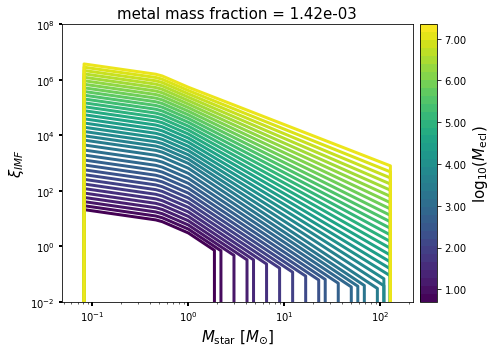

In [28]:
igimf4_obj.IMF_plots(mstar_v, IMF_v_list, Mecl_v, k_idx, metal_mass_fraction)

Mtot = 1000.0,	 m_max = 52.86375757156684,	 k(m_max)=304.4349169282045


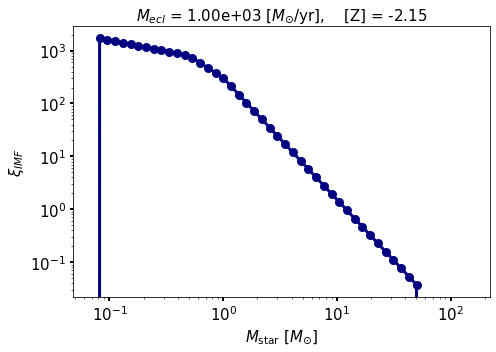

In [29]:
low_Z = 1e-4
Mtot_lowZ_IMF = 1e3
igimf4_metalpoor = IGIMF4.IGIMF(low_Z, downsizing_obj.SFR)
sIMF_lowZ = igimf4_metalpoor.stellar_IMF(Mtot_lowZ_IMF)
igimf4_metalpoor.IMF_plot(mstar_v, sIMF_lowZ[2](mstar_v), Mtot_lowZ_IMF)

Mtot = 3000.0,	 m_max = 0.19096076537812773,	 k(m_max)=1.3989230083217833e-08


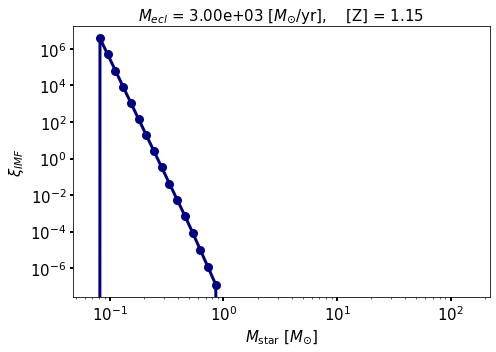

In [30]:
high_Z = 2e-1
Mtot_highZ_IMF = 3e3
igimf4_metalrich = IGIMF4.IGIMF(high_Z, downsizing_obj.SFR)
sIMF_highZ = igimf4_metalrich.stellar_IMF(Mtot_highZ_IMF)
igimf4_metalrich.IMF_plot(mstar_v, sIMF_highZ[2](mstar_v), Mtot_highZ_IMF)

In [31]:
# IMF_Z_v_list = []
# for Z in Z_massfrac_v:
#     IMF_Mecl_v_list = []
#     for M in Mecl_v:
#         igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
#         sIMF = igimf4_obj.stellar_IMF(M)
#         IMF_v = sIMF[2](mstar_v)
#         IMF_v_list.append(IMF_v)
#         #igimf4.ECMF_plot(Mecl_v, ECMF_v)
#     IMF_Z_v_list.append(IMF_Mecl_v_list)

In [32]:

def normalization_IMF(IMF, alpha1, alpha2, alpha3, Mtot, lower_lim, mass12, mass23, upper_lim) -> (float, float):
    def integral_IMF(ll, ul, power):
        if ll < ul:
            return np.divide(ul**(1-power) - ll**(1-power), 1-power)
        else:
            return 0.
    k = lambda x: (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                                + integral_IMF(mass12, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
    def weighted_IMF(m, x, alpha3):
        return m * IMF(m, alpha3) * k(x)
    func = lambda x: (integr.quad(weighted_IMF, lower_lim, x, args=(x, alpha3))[0] - Mtot)
    sol = optimize.root_scalar(func, x0=0.09, x1=2, rtol=1e-8)
    m_max = sol.root
    return k(m_max), m_max

In [33]:
def integral_IMF(ll, ul, power):
    if ll < ul:
        return np.divide(ul**(1-power) - ll**(1-power), 1-power)
    else:
        return 0.

In [34]:
alpha1 = 1.3
alpha2 = 2.3
alpha3 = 2.3
lower_lim = 0.07
mass12 = 0.5
mass23 = 1
upper_lim = 150

In [35]:
k = (np.vectorize(lambda x: (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                            + integral_IMF(mass12, mass23, alpha2) 
                            + integral_IMF(mass23, upper_lim, alpha3)))))

In [36]:
    def k(x):
        if (x > lower_lim and x < mass12):
            return (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                                + integral_IMF(mass12, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
        if (x > mass12 and x < mass23):
            return (np.reciprocal(integral_IMF(x, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
        if (x > mass23 and x < upper_lim):
            return (np.reciprocal(integral_IMF(x, upper_lim, alpha3)))
        else:
            return 0.

In [37]:
k_v = [k(m) for m in mstar_v]
#k_v[] = 0.
print(k_v)

[0.11779524661026457, 0.128037663045496, 0.13962093839420645, 0.15281125260243217, 0.16795003134425457, 0.1854825686445684, 0.20600079112037994, 0.23030904674131183, 0.2595288064273793, 0.29527206728841676, 0.3399425082679171, 0.3972895748975763, 0.4735036594248487, 0.5777096853253435, 0.7081863045632475, 0.8681604298950504, 1.0643153781895518, 1.3048561013573963, 1.5998593423171592, 1.9617062370886515, 2.4056177121014284, 2.95031851272049, 3.6188628897649764, 4.439664497737123, 5.4477858331179325, 6.686559896364633, 8.209640675067249, 10.083612497741102, 12.39133585818066, 15.236276056076967, 18.748162185063713, 23.090475790032105, 28.470500890857043, 35.15303068646404, 43.47940898319098, 53.894543203049196, 66.98615053292446, 83.5433448173429, 104.64684994198376, 131.81296807218445, 167.23312084492912, 214.19262666330414, 277.8480264961387, 366.78139497594543, 496.41961915366903, 697.5826408942467, 1042.1286925807694, 1745.5366989834215, 3884.9873506273657, 0.0]


In [38]:
def weighted_IMF(m, x, alpha3):
    return m * igimf4_obj.initial_mass_function(m, alpha3) * k(x)

In [39]:
IMFfunc = np.vectorize(lambda x: (integr.quad(weighted_IMF, lower_lim, x, args=(x, alpha3))[0] - Mtot_IMF))

In [40]:
from scipy import optimize
import scipy.integrate as integr
#sol = optimize.root_scalar(IMFfunc, x0=1, x1=20, rtol=1e-8)

In [41]:
#sol.root